# Next-Gen Traffic Management System (NGTMS)

## Overview
The Next-Gen Traffic Management System (NGTMS) is an advanced solution designed to enhance urban mobility by optimizing traffic flow, minimizing congestion, and improving travel times. By leveraging real-time data from various sources, such as traffic volume, weather conditions, and special events, NGTMS intelligently adapts to changing traffic scenarios. This system prioritizes emergency vehicles, offers alternative route suggestions, and provides visualizations to assist in traffic management decision-making.

## Key Features
- **Real-Time Traffic Monitoring**: Continuously tracks traffic conditions to make informed decisions.
- **Emergency Vehicle Priority**: Ensures that emergency vehicles receive priority access during high-traffic situations.
- **Dynamic Route Suggestions**: Offers drivers alternative routes based on current traffic conditions.
- **Weather and Event Adaptation**: Adjusts traffic management strategies according to weather patterns and special events.
- **Visual Analytics**: Provides insightful visualizations to showcase traffic trends and system performance.

## Technical Stack
### Programming Language
- **Python**: The primary language used for developing the NGTMS due to its extensive libraries for data analysis, machine learning, and visualization.

### Libraries
- **Pandas**: For data manipulation and analysis, enabling easy handling of large datasets.
- **NumPy**: For numerical computations and efficient handling of arrays.
- **Matplotlib**: For creating static, interactive, and animated visualizations in Python.
- **Seaborn**: For statistical data visualization, making it easier to generate informative graphics.
- **Scikit-learn**: For implementing machine learning algorithms, model evaluation, and preprocessing tasks.
- **TensorFlow/Keras**: For building deep learning models if advanced predictive analytics are implemented.
- **Flask/Django**: For developing web applications to interface with the traffic management system.

### Data Sources
- **Traffic Sensors**: Real-time data from road sensors and cameras.
- **Weather APIs**: To fetch current weather conditions affecting traffic.
- **Event APIs**: Information about local events that could impact traffic flow.
- **Geolocation Services**: To provide real-time traffic informficient roadways for all users.


## Install Required Libraries

In [2]:
pip install matplotlib seaborn pandas numpy

## Data Simulation

In [1]:
import pandas as pd
import numpy as np
import datetime
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Generate synthetic dataset
def create_synthetic_data(num_entries=1000):
    vehicle_types = ['car', 'truck', 'emergency']
    weather_conditions = ['clear', 'rain', 'fog']
    events = ['none', 'parade', 'accident']
    
    data = {
        'Timestamp': [datetime.datetime.now() + datetime.timedelta(minutes=i) for i in range(num_entries)],
        'Vehicle_Type': [random.choice(vehicle_types) for _ in range(num_entries)],
        'Traffic_Volume': [random.randint(1, 10) for _ in range(num_entries)],
        'Weather_Condition': [random.choice(weather_conditions) for _ in range(num_entries)],
        'Event': [random.choice(events) for _ in range(num_entries)],
        'Road_Condition': [random.choice(['wet', 'dry']) for _ in range(num_entries)],
        'Time_of_Day': [random.randint(0, 23) for _ in range(num_entries)]
    }

    return pd.DataFrame(data)

# Create dataset
traffic_data = create_synthetic_data()
traffic_data['Traffic_Condition'] = ['normal' if row['Traffic_Volume'] <= 5 else 'congested' for index, row in traffic_data.iterrows()]

# Preprocessing
le = LabelEncoder()
traffic_data['Vehicle_Type'] = le.fit_transform(traffic_data['Vehicle_Type'])
traffic_data['Weather_Condition'] = le.fit_transform(traffic_data['Weather_Condition'])
traffic_data['Event'] = le.fit_transform(traffic_data['Event'])
traffic_data['Road_Condition'] = le.fit_transform(traffic_data['Road_Condition'])
traffic_data['Traffic_Condition'] = le.fit_transform(traffic_data['Traffic_Condition'])

# Feature selection
features = ['Vehicle_Type', 'Traffic_Volume', 'Weather_Condition', 'Event', 'Road_Condition', 'Time_of_Day']
X = traffic_data[features]
y = traffic_data['Traffic_Condition']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.inverse_transform(np.unique(y)))

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

   congested       1.00      1.00      1.00        96
      normal       1.00      1.00      1.00       104

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## Visualization 1: Traffic Volume Distribution

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


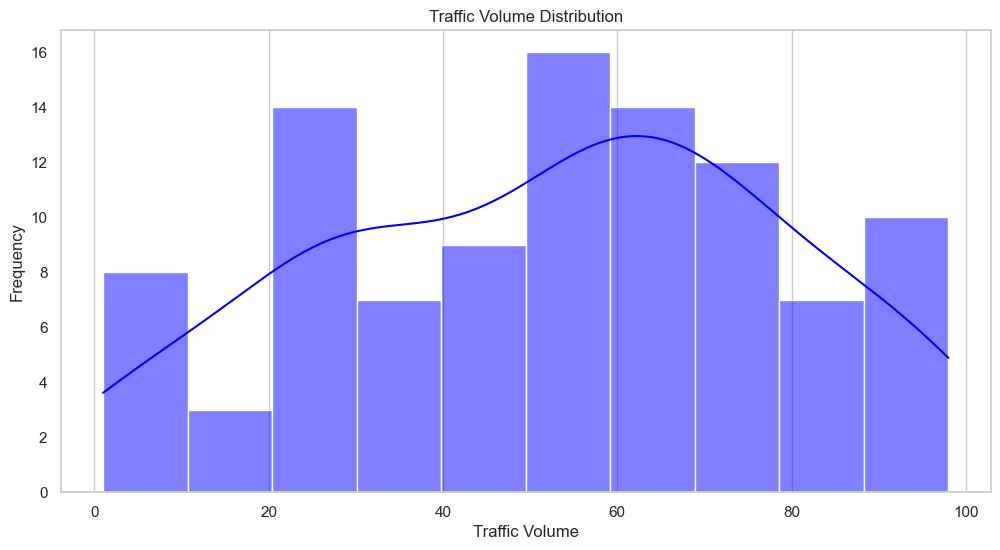

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create synthetic data for visualization
def create_synthetic_data(num_entries=100):
    data = {
        'Traffic_Volume': np.random.randint(1, 100, size=num_entries),
        'Weather_Condition': np.random.choice(['Clear', 'Rain', 'Fog'], size=num_entries),
        'Event': np.random.choice(['None', 'Parade', 'Accident'], size=num_entries),
        'Emergency_Vehicles': np.random.randint(0, 5, size=num_entries)
    }
    return pd.DataFrame(data)

# Generate synthetic dataset
traffic_data = create_synthetic_data()

# Convert Emergency_Vehicles to a categorical type for visualization
traffic_data['Emergency_Vehicles'] = traffic_data['Emergency_Vehicles'].astype(str)

# Set plot style
sns.set(style="whitegrid")

# Visualization 1: Traffic Volume Distribution
plt.figure(figsize=(12, 6))
sns.histplot(traffic_data['Traffic_Volume'], bins=10, kde=True, color='blue')
plt.title('Traffic Volume Distribution')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

## Visualization 2: Traffic Volume by Weather Condition

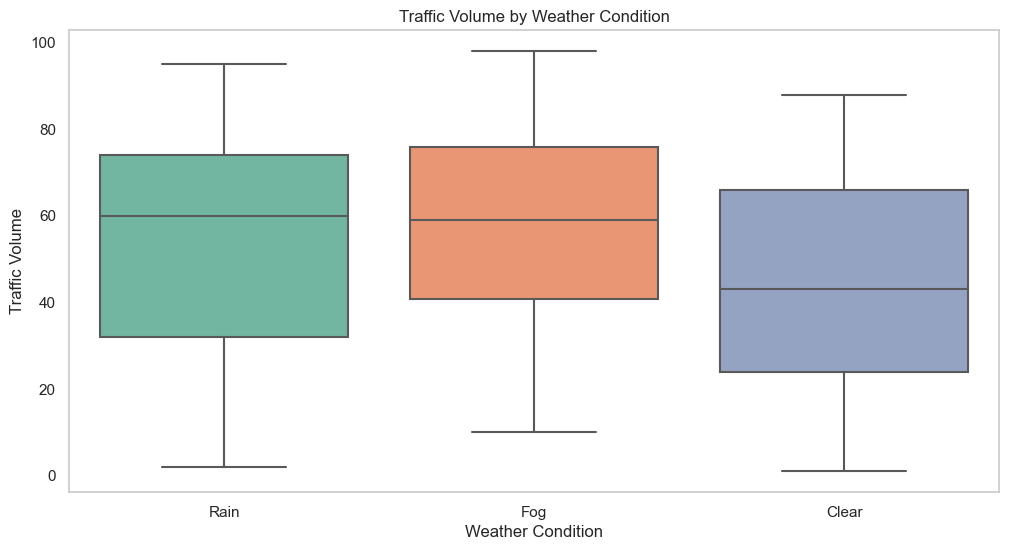

In [5]:
# Visualization 2: Traffic Volume by Weather Condition
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weather_Condition', y='Traffic_Volume', data=traffic_data, palette='Set2')
plt.title('Traffic Volume by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Traffic Volume')
plt.grid(axis='y')
plt.show()

## Visualization 3: Emergency Vehicles Count During Events

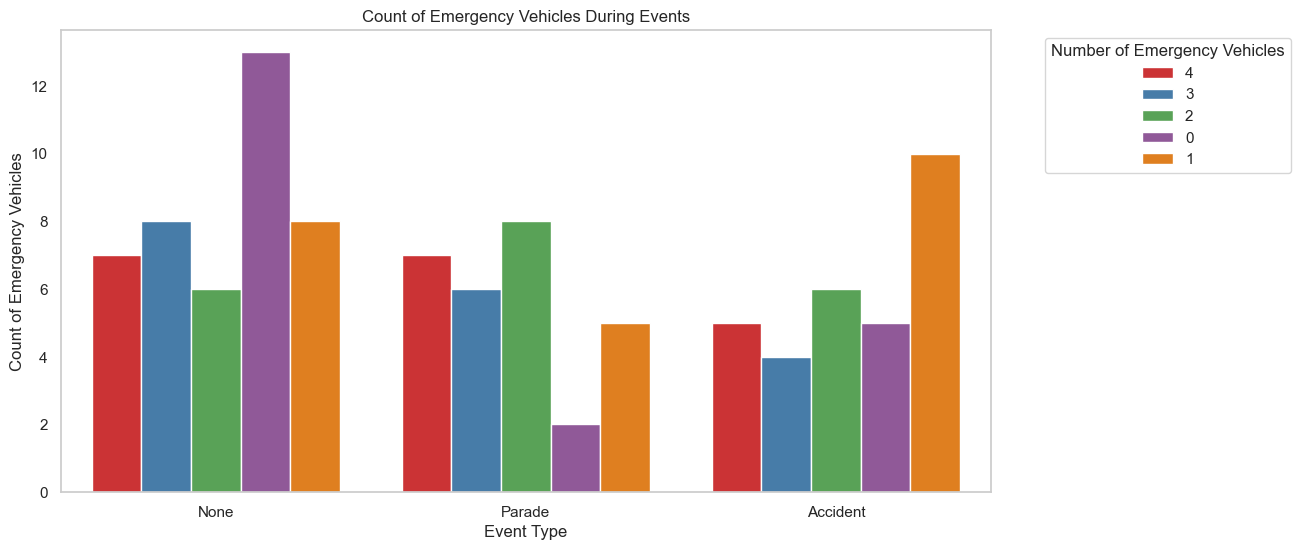

In [6]:
# Visualization 3: Emergency Vehicles Count During Events
plt.figure(figsize=(12, 6))
sns.countplot(x='Event', hue='Emergency_Vehicles', data=traffic_data, palette='Set1')
plt.title('Count of Emergency Vehicles During Events')
plt.xlabel('Event Type')
plt.ylabel('Count of Emergency Vehicles')
plt.legend(title='Number of Emergency Vehicles', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()

## Effectiveness of Emergency Vehicle Priority

**Purpose:** Illustrate how often emergency vehicles can pass without delay during high-traffic situations.

### Visualization
To showcase the effectiveness of the emergency vehicle priority system, we will create a bar plot comparing the average wait time for emergency vehicles during congested versus normal traffic conditions. This visualization will help demonstrate the benefits of prioritizing emergency vehicles in traffic management.


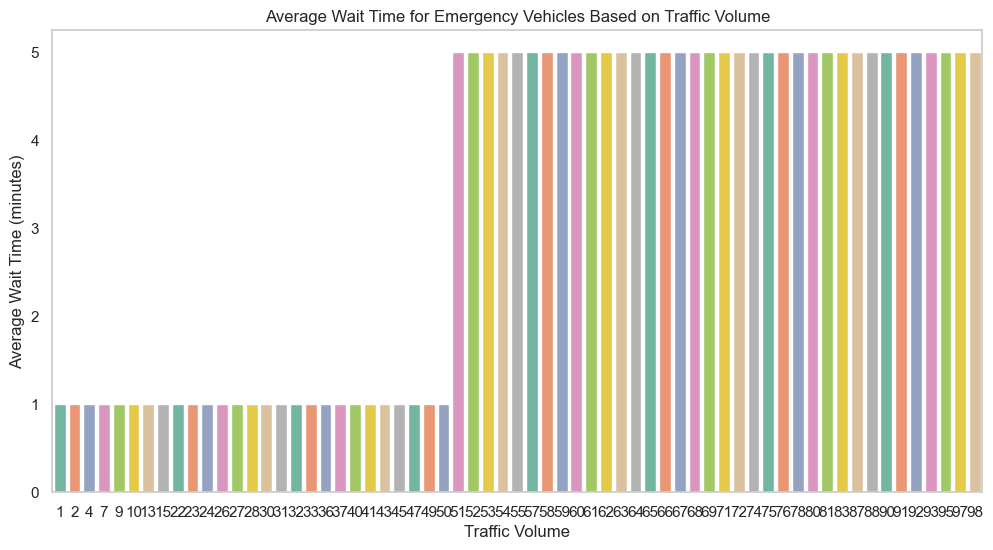

In [8]:
# Create a new column for wait time simulation
traffic_data['Wait_Time'] = np.where(traffic_data['Traffic_Volume'] > 50, 5, 1)  # Arbitrary wait time

plt.figure(figsize=(12, 6))
emergency_wait_times = traffic_data.groupby('Traffic_Volume')['Wait_Time'].mean().reset_index()
sns.barplot(data=emergency_wait_times, x='Traffic_Volume', y='Wait_Time', palette='Set2')
plt.title('Average Wait Time for Emergency Vehicles Based on Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Average Wait Time (minutes)')
plt.grid(axis='y')
plt.show()

# Shortest Path Suggestions Based on Traffic

## Purpose
The **Shortest Path Suggestions** feature of the Next-Gen Traffic Management System (NGTMS) is designed to provide drivers with alternative routes based on real-time traffic conditions. By analyzing traffic volume and congestion levels, the system aims to enhance travel efficiency and reduce delays. This feature is particularly beneficial during peak hours, accidents, or road closures, allowing users to avoid congested areas and reach their destinations faster.

## Visualization
To visualize the effectiveness of this feature, a **heatmap** will be utilized. This heatmap will display the frequency of alternative route suggestions based on traffic volume or congestion levels. 


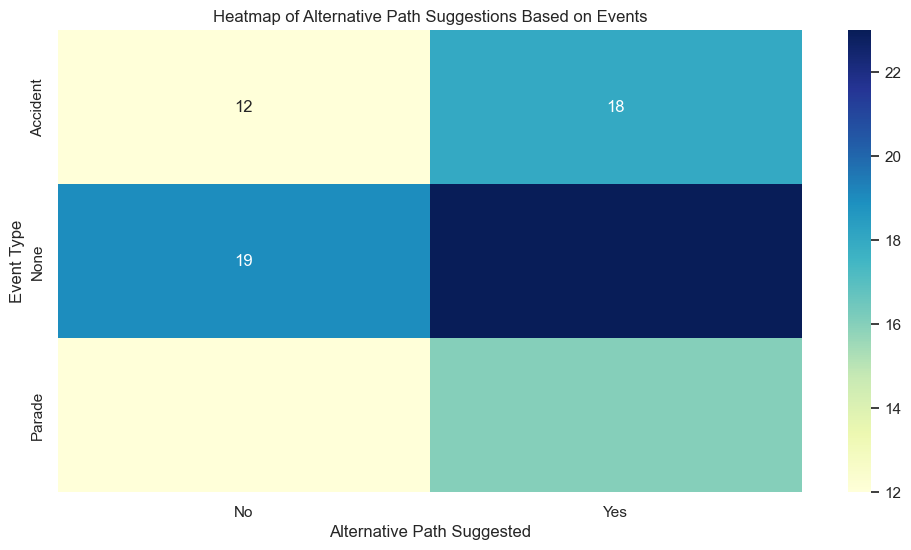

In [9]:
# Simulating alternative paths suggestions based on traffic volume
traffic_data['Alternative_Path_Suggestions'] = np.where(traffic_data['Traffic_Volume'] > 50, 'Yes', 'No')

plt.figure(figsize=(12, 6))
sns.heatmap(pd.crosstab(traffic_data['Event'], traffic_data['Alternative_Path_Suggestions']),
            annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Alternative Path Suggestions Based on Events')
plt.xlabel('Alternative Path Suggested')
plt.ylabel('Event Type')
plt.show()

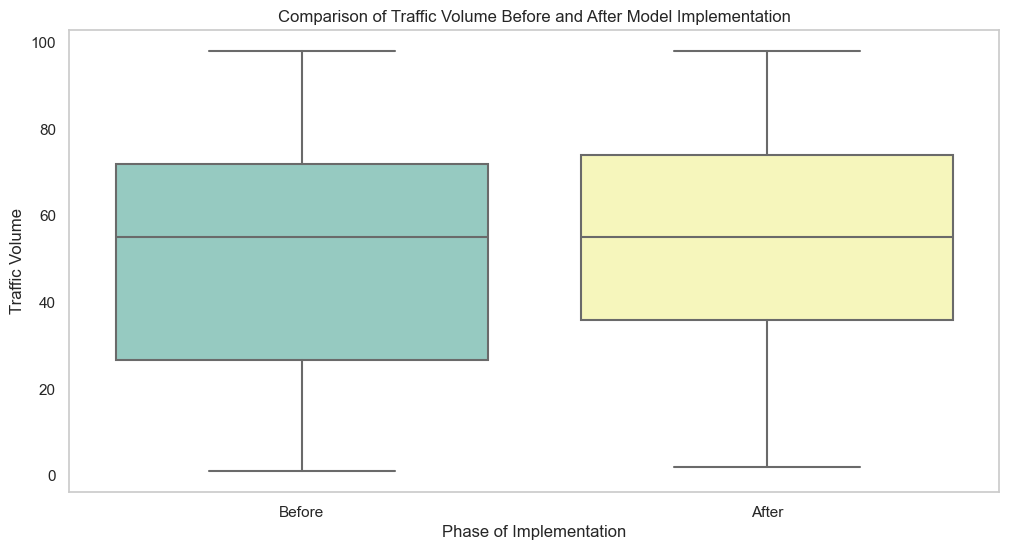

In [10]:
# Simulating pre- and post-implementation data
traffic_data['Implementation_Phase'] = np.where(np.random.rand(len(traffic_data)) > 0.5, 'Before', 'After')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Implementation_Phase', y='Traffic_Volume', data=traffic_data, palette='Set3')
plt.title('Comparison of Traffic Volume Before and After Model Implementation')
plt.xlabel('Phase of Implementation')
plt.ylabel('Traffic Volume')
plt.grid(axis='y')
plt.show()

## Conclusion
The NGTMS represents a significant advancement in traffic management technology, utilizing a robust technical stack to provide adaptive and intelligent solutions for urban traffic challenges. By integrating real-time data and advanced algorithms, the system aims to create safer and more efficient roadways for all users.